In [1]:
import os, sys, json, csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import seaborn as sns

In [2]:
def get_df(filename):
    df = pd.read_csv(filename, delimiter="\t", names=['n', 'P@n', 'R@n','F@n'])
    df['F@n'] = df['F@n'].replace({',':''}, regex=True)
    df[['P@n', 'R@n', 'F@n']] = df[['P@n', 'R@n', 'F@n']].astype('float64')
    return df
df1 = get_df("query1.csv")
df2 = get_df("query2.csv")
df3 = get_df("query3.csv")
df4 = get_df("query4.csv")
df5 = get_df("query5.csv")
df6 = get_df("query6.csv")
df7 = get_df("query7.csv")

df1


,n,P@n,R@n,F@n
0,1,1.00,0.14,0.25
1,2,0.50,0.14,0.22
2,3,0.33,0.14,0.20
3,4,0.50,0.29,0.36
4,5,0.60,0.43,0.50
...,...,...,...,...
59,60,0.12,1.00,0.21
60,61,0.11,1.00,0.21
61,62,0.11,1.00,0.20
62,63,0.11,1.00,0.20


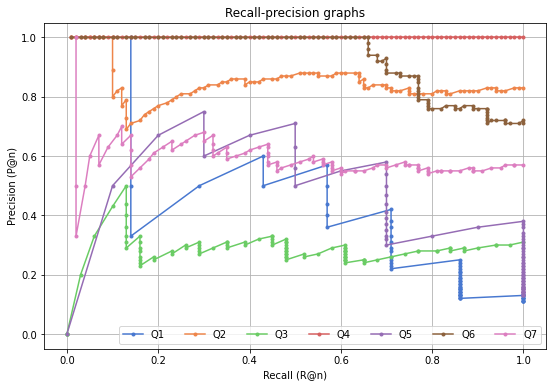

In [3]:
ax = \
df1.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[0], style='-o', label="Q1", figsize=(9, 6))
df2.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[1], style='-o', label="Q2", ax=ax)
df3.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[2], style='-o', label="Q3", ax=ax)
df4.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[3], style='-o', label="Q4", ax=ax)
df5.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[4], style='-o', label="Q5", ax=ax)
df6.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[5], style='-o', label="Q6", ax=ax)
df7.plot.line(x='R@n', y='P@n', markersize=3, color=sns.color_palette("muted")[6], style='-o', label="Q7", ax=ax)
plt.title("Recall-precision graphs")
plt.xlabel("Recall (R@n)")
plt.ylabel("Precision (P@n)")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.legend(loc="lower right", ncol=7)
plt.savefig('recall-precision.svg', bbox_inches='tight')

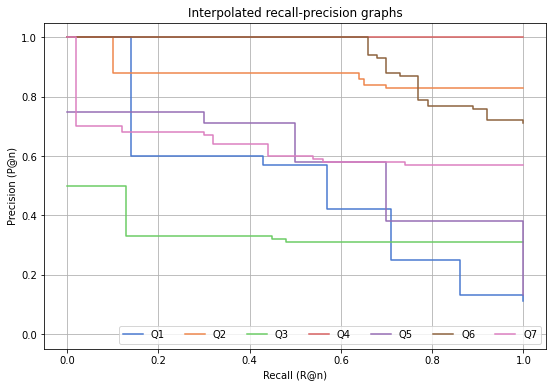

In [4]:
def interpolate(R, P):
    N = len(R)

    x, y = [], []

    r = 1
    p = P[N-1]
    x.append(1)
    y.append(p)
    for i in range(N-1, -1, -1):
        r = R[i]
        p_ = P[i]
        if p_ > p:
            x.append(r)
            y.append(p)
            p = p_
            x.append(r)
            y.append(p)
    r = 0
    x.append(r)
    y.append(p)
    x.reverse()
    y.reverse()
    return pd.DataFrame({'R@n': x, 'P@n': y })

i1 = interpolate(df1['R@n'], df1['P@n'])
i2 = interpolate(df2['R@n'], df2['P@n'])
i3 = interpolate(df3['R@n'], df3['P@n'])
i4 = interpolate(df4['R@n'], df4['P@n'])
i5 = interpolate(df5['R@n'], df5['P@n'])
i6 = interpolate(df6['R@n'], df6['P@n'])
i7 = interpolate(df7['R@n'], df7['P@n'])

ax = \
i1.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[0], label="Q1", figsize=(9, 6))
i2.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[1], label="Q2", ax=ax)
i3.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[2], label="Q3", ax=ax)
i4.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[3], label="Q4", ax=ax)
i5.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[4], label="Q5", ax=ax)
i6.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[5], label="Q6", ax=ax)
i7.plot.line(x='R@n', y='P@n', color=sns.color_palette("muted")[6], label="Q7", ax=ax)
plt.title("Interpolated recall-precision graphs")
plt.xlabel("Recall (R@n)")
plt.ylabel("Precision (P@n)")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.legend(loc="lower right", ncol=7)
ax.set_axisbelow(True)
plt.savefig('recall-precision-interpolated.svg', bbox_inches='tight')

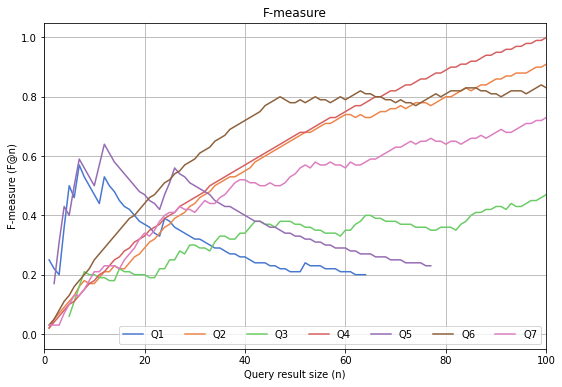

In [5]:
ax = \
df1.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[0], style='-', label="Q1", figsize=(9, 6))
df2.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[1], style='-', label="Q2", ax=ax)
df3.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[2], style='-', label="Q3", ax=ax)
df4.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[3], style='-', label="Q4", ax=ax)
df5.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[4], style='-', label="Q5", ax=ax)
df6.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[5], style='-', label="Q6", ax=ax)
df7.plot.line(x='n', y='F@n', markersize=3, color=sns.color_palette("muted")[6], style='-', label="Q7", ax=ax)
plt.title("F-measure")
plt.xlabel("Query result size (n)")
plt.ylabel("F-measure (F@n)")
plt.xlim([0, 100])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.legend(loc="lower right", ncol=7)
plt.savefig('f-measure.svg', bbox_inches='tight')